In [3]:
import torch

dbarf = torch.load('/home/gyy/Downloads/dgaussin_train/dgaussian/checkpoint/dbarf_model_200000.pth',map_location=torch.device('cuda:0'))
ibrnet = torch.load('pretrain_ibrent/pretrained/model_255000.pth',map_location=torch.device('cuda:0'))
print(dbarf.keys())
print(ibrnet.keys())
dbarf['feature_net']=ibrnet['feature_net']
dbarf['net_coarse']=ibrnet['net_coarse']
torch.save(dbarf,'./pretrain_ibrent/pretrained/dbarf_ibrnet.pth')
# new_model = {}
# new_model['pose_learner'] = dbarf['pose_learner']
# new_model['gaussian'] = pixelsplat['state_dict']
# torch.save(new_model,'./model_zoo/dgaussian_resnet.pth')

dict_keys(['optimizer', 'scheduler', 'pose_optimizer', 'pose_scheduler', 'net_coarse', 'feature_net', 'pose_learner'])
dict_keys(['optimizer', 'scheduler', 'net_coarse', 'net_fine', 'feature_net'])


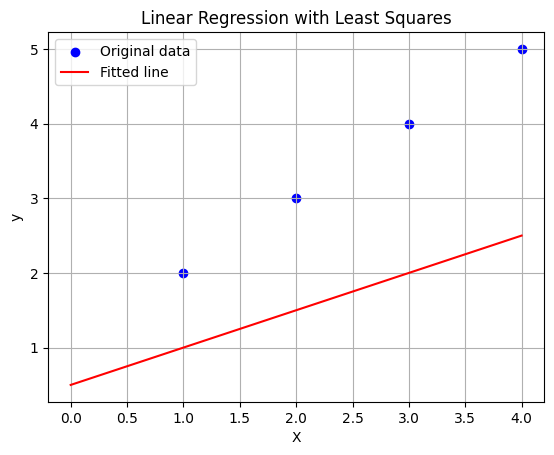

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def least_squares(X, y):
    """
    最小二乘法求解线性回归问题
    
    参数：
    X: 输入特征矩阵，每行代表一个样本的特征，每列代表一个特征维度
    y: 输出标签向量，每个元素代表相应样本的输出
    
    返回值：
    theta: 模型参数向量，即回归系数
    """
    # 添加偏置项（常数项）到特征矩阵中
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # 使用伪逆计算参数
    theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    
    return theta

# 构造一个简单的数据集
X = np.array([[1, 1], [1, 2], [1, 3], [1, 4]])
y = np.array([2, 3, 4, 5])

# 使用最小二乘法拟合线性模型
theta = least_squares(X, y)

# 绘制原始数据点
plt.scatter(X[:, 1], y, color='blue', label='Original data')

# 绘制拟合的线性模型
x_values = np.linspace(0, 4, 100)
y_values = theta[0] + theta[1] * x_values
plt.plot(x_values, y_values, color='red', label='Fitted line')

# 设置图例和标签
plt.legend()
plt.title('Linear Regression with Least Squares')
plt.xlabel('X')
plt.ylabel('y')

# 显示图形
plt.grid(True)
plt.show()


(560, 560)


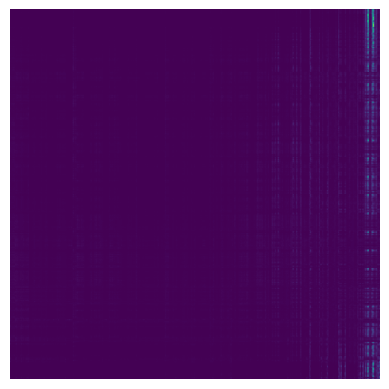

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 创建形状为 (140, 140, 1) 的示例数组（假设是灰度图像）
gray_image = np.load('origin_full_attn.npy')
gray_image = gray_image[0,0,:,:]
print(gray_image.shape)
# 将灰度图像转换为 RGB 图像
# rgb_image = np.repeat(gray_image, 3, axis=-1)

# 显示 RGB 图像
plt.imshow(gray_image)
plt.axis('off')  # 关闭坐标轴
plt.show()

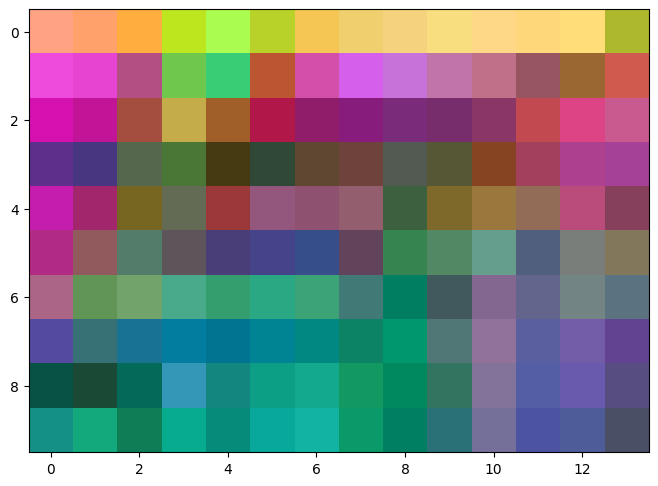

In [31]:
from sklearn.decomposition import PCA
import sklearn
import time
from PIL import Image
import matplotlib.pyplot as plt
import torch

feats=np.load('token_rp_PCA.npy')
feats=feats[0:1,:,:,:]
fmap = torch.from_numpy(feats).cuda()
pca = sklearn.decomposition.PCA(3, random_state=80)
f_samples =  fmap.permute(0, 2, 3, 1).reshape(-1, fmap.shape[1])[::3].cpu().numpy()
transformed = pca.fit_transform(f_samples)
feature_pca_mean = torch.tensor(f_samples.mean(0)).float().cuda()
feature_pca_components = torch.tensor(pca.components_).float().cuda()
q1, q99 = np.percentile(transformed, [1, 99])
feature_pca_postprocess_sub = q1
feature_pca_postprocess_div = (q99 - q1)
del f_samples

vis_feature = (fmap.permute(0, 2, 3, 1).reshape(-1, fmap.shape[1]) - feature_pca_mean[None, :]) @ feature_pca_components.T
vis_feature = (vis_feature - feature_pca_postprocess_sub) / feature_pca_postprocess_div
vis_feature = vis_feature.clamp(0.0, 1.0).float().reshape((fmap.shape[2], fmap.shape[3], 3)).cpu()

plt.figure(figsize=(8, 6))
plt.imshow((vis_feature.cpu().numpy() * 255).astype(np.uint8))
plt.show()

In [3]:
# new_model['gaussian'].keys()
import fnmatch
a=fnmatch.filter(new_model['gaussian'].keys(),'encoder.backbone.local_token_mlp.*')
b=fnmatch.filter(new_model['gaussian'].keys(),'encoder.backbone.dino.*')
c=fnmatch.filter(new_model['gaussian'].keys(),'encoder.backbone.global_token_mlp.*')
# print(a) encoder.backbone.dino. encoder.backbone.global_token_mlp
for key in a:
    new_model['gaussian'].pop(key)
for key in b:
    new_model['gaussian'].pop(key)
for key in c:
    new_model['gaussian'].pop(key)
new_model['gaussian'].keys()
torch.save(new_model,'./model_zoo/dgaussian_resnet.pth')
# del new_model['gaussian']['encoder.backbone.dino.*']
# new_model['gaussian'].keys()

In [8]:
import torch
ibrnet = torch.load('/home/gyy/Downloads/dgaussian/data/ibrnet/train/out/waymo_ibrnet/model/model_020000.pth',map_location=torch.device('cuda:0'))
dbarf =torch.load('/home/gyy/Downloads/dgaussin_train/dgaussian/checkpoint/dbarf_model_200000.pth',map_location=torch.device('cuda:0'))

In [10]:
print(ibrnet.keys())
print(dbarf.keys())
for key in ibrnet.keys():
    if key!='step':
        ibrnet[key]=dbarf[key]
torch.save(ibrnet,'data/ibrnet/train/out/waymo_ibrnet_1/model.pth')

dict_keys(['step', 'net_coarse', 'feature_net', 'optimizer', 'scheduler'])
dict_keys(['optimizer', 'scheduler', 'pose_optimizer', 'pose_scheduler', 'net_coarse', 'feature_net', 'pose_learner'])


In [3]:
import torch

origin = torch.load('./model_zoo/dgaussian_resnet.pth',map_location=torch.device('cuda:0'))
dbarf0 = torch.load('./data/ibrnet/train/out/depth_room/model/model_000000.pth',map_location=torch.device('cuda:0'))
dbarf500 = torch.load('./data/ibrnet/train/out/depth_room/model/model_000500.pth',map_location=torch.device('cuda:0'))
dbarf2000 = torch.load('data/ibrnet/train/out/no_depth_room_lr/model/model_002000.pth',map_location=torch.device('cuda:0'))


In [5]:
dbarf500.keys()

dict_keys(['step', 'pose_learner', 'gaussian', 'pose_optimizer', 'pose_scheduler'])

In [ ]:

attn = attn > 0

In [ ]:
import matplotlib.pyplot as plt
fig,a =  plt.subplots(h,w)
for i, per_img_masks in enumerate(attn):
    for j, per_mask in enumerate(per_img_masks):
        norm_mask = per_mask / np.linalg.norm(per_mask)
        a[i][j].set_axis_off()
        a[i][j].imshow(norm_mask)
plt.axis("off")
plt.savefig('out/feat_attn.pdf', bbox_inches='tight')

In [ ]:
import torch
import numpy as np
feat_2d = torch.from_numpy(np.load("out/feat_2d.npy")).to("cuda:1")
roi = feat_2d[250:252, 190:192, 32:]

keys = out / out.norm(dim=0, keepdim=True)
queries = roi / roi.norm(dim=1, keepdim=True)
attn = queries @ keys.reshape(keys.shape[0], -1)
h, w = attn.shape[:2]
attn = attn.reshape(h, w, 192, 252).to('cpu').detach().numpy()


In [ ]:
import torch

# 定义 query 和 key tensor
query = torch.randn(1, 13, 17, 256)
key = torch.randn(1, 100, 200, 256)

# 将 query 和 key 分别转换为形状为 (1, 256, 13, 17) 和 (1, 256, 100, 200) 的 tensor
query = query.permute(0, 3, 1, 2)
key = key.permute(0, 3, 1, 2)

# 使用 2D 卷积计算 correlation map
corr_map = torch.nn.functional.conv2d(key, query, stride=1)

# 转换 correlation map 的形状为 (1, 13, 17, 100, 200)
corr_map = corr_map.permute(0, 2, 3, 1)


In [ ]:
norm_mask = attn[6][6] # / np.linalg.norm(attn[1][5])
np.min(norm_mask)
# norm_mask = norm_mask > 0.9
plt.imshow(norm_mask)
plt.colorbar()

In [ ]:
keys.unique()

In [ ]:
np.unique(attn)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
for pose in all_poses:
    # 姿态的位置信息
    position = pose[:3, 3]
    x, y, z = position

    # 姿态的旋转信息
    rotation = pose[:3, :3]

    # 绘制位置
    ax.scatter(x, y, z, c='r', marker='o')

    # 绘制方向箭头
    arrow_length = 0.1
    ax.quiver(x, y, z, rotation[0, 0], rotation[1, 0], rotation[2, 0], length=arrow_length, color='r')
    ax.quiver(x, y, z, rotation[0, 1], rotation[1, 1], rotation[2, 1], length=arrow_length, color='g')
    ax.quiver(x, y, z, rotation[0, 2], rotation[1, 2], rotation[2, 2], length=arrow_length, color='b')


# # 设置坐标轴范围
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
# ax.set_zlim([zmin, zmax])

# 显示图形
plt.show()



In [ ]:
import numpy as np
np.save("outputs/depth_room.npy", depth.cpu().detach().numpy())

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
predicted_labels = np.load("out/predicted_labels.npy")
true_labels = np.load("out/true_labels.npy")

plt.imshow(true_labels)
plt.show()
plt.imshow(predicted_labels)
plt.show()


In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import torch
def calc_pca(emb, vis=False):
    X = emb.flatten(0, -2).cpu().numpy()
    np.random.seed(80)
    pca = PCA(n_components=3)
    pca.fit(X)
    X_rgb = pca.transform(X).reshape(*emb.shape[:2], 3)
    if vis:
        plt.imshow(X_rgb)
        plt.axis("off")
        plt.show()
    return X_rgb

agg_feat_2d = np.load("out/agg_feat_2d.npy")
agg_feat_2d = torch.from_numpy(agg_feat_2d)
calc_pca(agg_feat_2d, vis=True)

cnn_feat_2d = np.load("out/cnn_feat_2d.npy")
cnn_feat_2d = torch.from_numpy(cnn_feat_2d).permute(1,2,0)
calc_pca(cnn_feat_2d, vis=True)

In [ ]:
agg_feat_2d = np.load("out/sems.npy")[0]
agg_feat_2d = torch.from_numpy(agg_feat_2d)
calc_pca(agg_feat_2d, vis=True)

cnn_feat_2d = np.load("/home/hao/lihao/GNT/out/sems.npy")[0]
cnn_feat_2d = torch.from_numpy(cnn_feat_2d)
calc_pca(cnn_feat_2d, vis=True)

import torch.nn.functional as F
print(F.cosine_similarity(cnn_feat_2d, agg_feat_2d))